## Import resources

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import seaborn as sns
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools # needed in the confusion matrix

In [3]:
train = pd.read_csv("./data/train.csv")
print(train.shape)
train.head(3)

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Explore the Dataset

In [4]:
counter_train = Counter(train['label'])
counter_train

Counter({1: 4684,
         0: 4132,
         4: 4072,
         7: 4401,
         3: 4351,
         5: 3795,
         8: 4063,
         9: 4188,
         2: 4177,
         6: 4137})

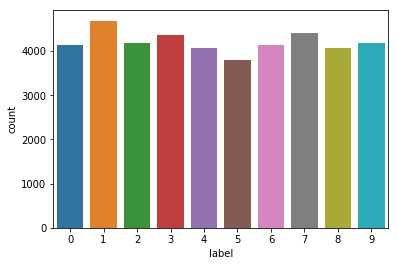

In [5]:
sns.countplot(train['label'])

In [6]:
#loading the dataset.......(Test)
test= pd.read_csv("./data/test.csv")
print(test.shape)
test.head(3)

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Preprocess Data

In [7]:
#convert to values
x_train = (train.iloc[:,1:].values).astype('float32') # all pixel values
y_train = train.iloc[:,0].values.astype('int32') # only labels i.e targets digits
x_test = test.values.astype('float32')

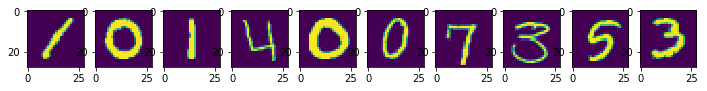

In [8]:
# preview the images first
plt.figure(figsize=(12,10))
x, y = 10, 4
for i in range(10):  
    plt.subplot(y, x, i+1)
    plt.imshow(x_train[i].reshape((28,28)),interpolation='nearest')
plt.show()

In [9]:
# Normalization
x_train = x_train/255.0
x_test = x_test/255.0

In [10]:
y_train

array([1, 0, 1, ..., 7, 6, 9])

In [11]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (42000, 784)
42000 train samples
28000 test samples


In [12]:
# Reshape To Match Keras's requirements
X_train = x_train.reshape(x_train.shape[0], 28, 28,1)
X_test = x_test.reshape(x_test.shape[0], 28, 28,1)

# The model 

In [13]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
batch_size = 64
num_classes = 10
epochs = 20
input_shape = (28, 28, 1)

Using TensorFlow backend.


In [14]:
# convert to One Hot
y_train = keras.utils.to_categorical(y_train, num_classes)
# cross validation set
X_train, X_val, Y_train, Y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state=42)

In [15]:
# Build the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal',input_shape=input_shape))
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.20))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

In [16]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.RMSprop(), metrics=['accuracy'])

In [17]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.5, min_lr=0.0001)

In [18]:
# for data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,             # set input mean to 0 over the dataset
        samplewise_center=False,              # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,   # divide each input by its std
        zca_whitening=False,                  # apply ZCA whitening
        rotation_range=15,                    # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1,                     # Randomly zoom image 
        width_shift_range=0.1,                # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,               # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,                # randomly flip images
        vertical_flip=False)                  # randomly flip images

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
__________

## Train the model

In [20]:
datagen.fit(X_train)

In [21]:
h = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 1, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction],)

Epoch 1/20
590/590 [==============================] - 213s 361ms/step - loss: 0.3474 - acc: 0.8906 - val_loss: 0.0810 - val_acc: 0.9752
Epoch 2/20
590/590 [==============================] - 220s 373ms/step - loss: 0.1070 - acc: 0.9668 - val_loss: 0.0501 - val_acc: 0.9864
Epoch 3/20
590/590 [==============================] - 217s 368ms/step - loss: 0.0850 - acc: 0.9731 - val_loss: 0.0387 - val_acc: 0.9876
Epoch 4/20
590/590 [==============================] - 235s 398ms/step - loss: 0.0699 - acc: 0.9794 - val_loss: 0.0512 - val_acc: 0.9838
Epoch 5/20
590/590 [==============================] - 230s 390ms/step - loss: 0.0653 - acc: 0.9798 - val_loss: 0.0345 - val_acc: 0.9893
Epoch 6/20
590/590 [==============================] - 213s 361ms/step - loss: 0.0554 - acc: 0.9827 - val_loss: 0.0227 - val_acc: 0.9921
Epoch 7/20
590/590 [==============================] - 211s 358ms/step - loss: 0.0536 - acc: 0.9837 - val_loss: 0.0263 - val_acc: 0.9910
Epoch 8/20
590/590 [============================

## Evaluation

In [22]:
final_loss, final_acc = model.evaluate(X_val, Y_val, verbose=0)
print("Final loss: {0:.6f}, final accuracy: {1:.6f}".format(final_loss, final_acc))

Final loss: 0.015160, final accuracy: 0.995000


In [23]:
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val, axis = 1) 

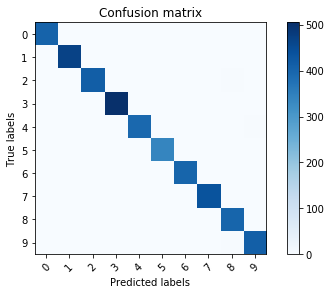

In [31]:
# Create confusion matrix
conf_mat = confusion_matrix(Y_true, Y_pred_classes)
# plot confusion matrix
plt.imshow(conf_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
ticks = np.arange(num_classes)
plt.xticks(ticks, range(num_classes), rotation=45)
plt.yticks(ticks, range(num_classes))
plt.tight_layout()
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
plt.show()

In [32]:
print(h.history.keys())
accuracy = h.history['acc']
val_accuracy = h.history['val_acc']
loss = h.history['loss']
val_loss = h.history['val_loss']
epochs = range(len(accuracy))

dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'lr'])


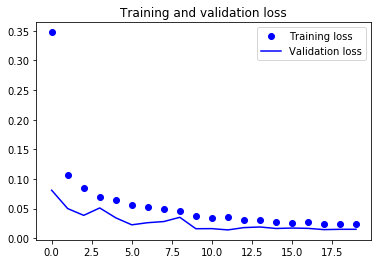

In [33]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [34]:
# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_val[errors]

In [51]:
def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

In [52]:
# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)
# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))
# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

### Visualize some errors

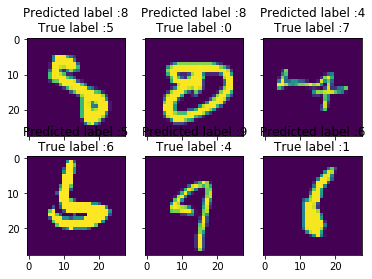

In [53]:
# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)
# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

## Predictions for the test data

In [55]:
predicted_classes = model.predict_classes(X_test)

In [56]:
#get the indices to be plotted
y_true = test.iloc[:, 0]
correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]

In [57]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

             precision    recall  f1-score   support

    Class 0       1.00      0.10      0.18     28000
    Class 1       0.00      0.00      0.00         0
    Class 2       0.00      0.00      0.00         0
    Class 3       0.00      0.00      0.00         0
    Class 4       0.00      0.00      0.00         0
    Class 5       0.00      0.00      0.00         0
    Class 6       0.00      0.00      0.00         0
    Class 7       0.00      0.00      0.00         0
    Class 8       0.00      0.00      0.00         0
    Class 9       0.00      0.00      0.00         0

avg / total       1.00      0.10      0.18     28000



c:\users\pc\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


## Save results for submission

In [60]:
submissions=pd.DataFrame({"ImageId": list(range(1,len(predicted_classes)+1)), "Label": predicted_classes})

submissions.to_csv("mnist_keras_1.csv", index=False, header=True)

In [63]:
model.save('mnist_keras_1.h5')
json_string = model.to_json()